In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
CITIES = [
    "New York", "London", "Tokyo", "Mumbai", "Sydney", "Paris", "Berlin", "Dubai",
    "Singapore", "Los Angeles", "Toronto", "Hong Kong", "Chicago", "Shanghai", "Moscow",
    "São Paulo", "Seoul", "Bangkok", "Jakarta", "Mexico City", "Istanbul", "Delhi",
    "Rome", "Barcelona", "San Francisco", "Kuala Lumpur", "Buenos Aires", "Beijing",
    "Cairo", "Cape Town", "Madrid", "Vienna", "Amsterdam", "Zurich", "Brussels",
    "Lagos", "Manila", "Stockholm", "Rio de Janeiro", "Bogotá", "Johannesburg",
    "Hanoi", "Warsaw", "Munich", "Dublin", "Prague", "Osaka", "Melbourne", "Lisbon"
]

In [4]:
def get_lat_lon(city):
    geo_url = f"https://geocoding-api.open-meteo.com/v1/search?name={city}&count=1"
    response = requests.get(geo_url)
    
    if response.status_code == 200 and response.json().get("results"):
        location = response.json()["results"][0]
        return location["latitude"], location["longitude"]
    
    print(f"Could not find coordinates for {city}")
    return None, None

In [5]:
def get_weather_data(city):
    lat, lon = get_lat_lon(city)
    if lat is None or lon is None:
        return None

    weather_url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current_weather=true"
    response = requests.get(weather_url)

    if response.status_code == 200:
        data = response.json()
        return {
            "City": city,
            "Temperature": data["current_weather"]["temperature"]
        }
    
    print(f"Failed to get data for {city}")
    return None

In [6]:
data_list = [get_weather_data(city) for city in CITIES]
data_list = [data for data in data_list if data]

In [7]:
df = pd.DataFrame(data_list)
print(df)

              City  Temperature
0         New York         -8.2
1           London         12.3
2            Tokyo          4.1
3           Mumbai         31.4
4           Sydney         19.6
5            Paris          9.8
6           Berlin         -0.4
7            Dubai         27.4
8        Singapore         30.3
9      Los Angeles         10.5
10         Toronto        -11.8
11       Hong Kong         17.4
12         Chicago        -14.0
13        Shanghai          5.6
14          Moscow         -5.6
15       São Paulo         22.5
16           Seoul         -3.7
17         Bangkok         30.1
18         Jakarta         29.2
19     Mexico City         12.6
20        Istanbul          2.7
21           Delhi         23.5
22            Rome         10.1
23       Barcelona         13.4
24   San Francisco          8.9
25    Kuala Lumpur         29.6
26    Buenos Aires         20.9
27         Beijing          3.5
28           Cairo         18.8
29       Cape Town         32.5
30      

In [8]:
top_10_hottest = df.nlargest(10, "Temperature")
top_10_coldest = df.nsmallest(10, "Temperature")

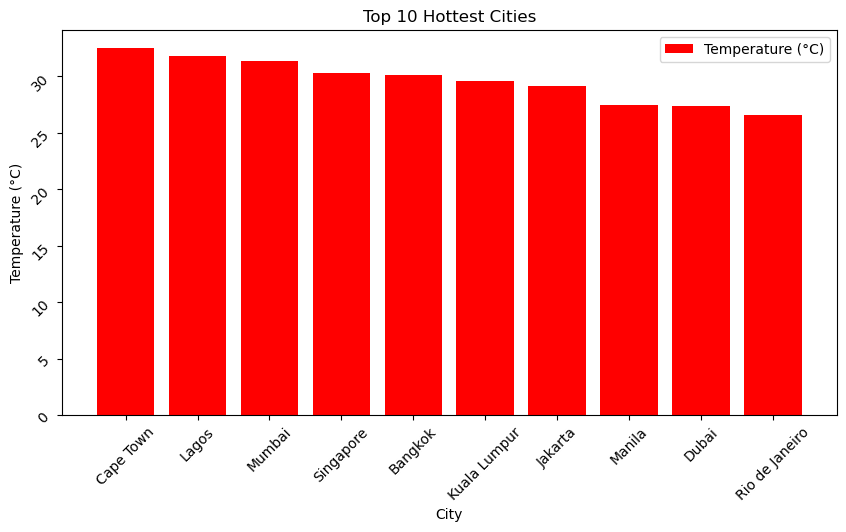

In [15]:
plt.figure(figsize=(10, 5))
plt.bar(top_10_hottest["City"], top_10_hottest["Temperature"],color='r',label='Temperature (°C)')
plt.xlabel("City")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.ylabel("Temperature (°C)")
plt.title("Top 10 Hottest Cities")
plt.legend()
plt.show()

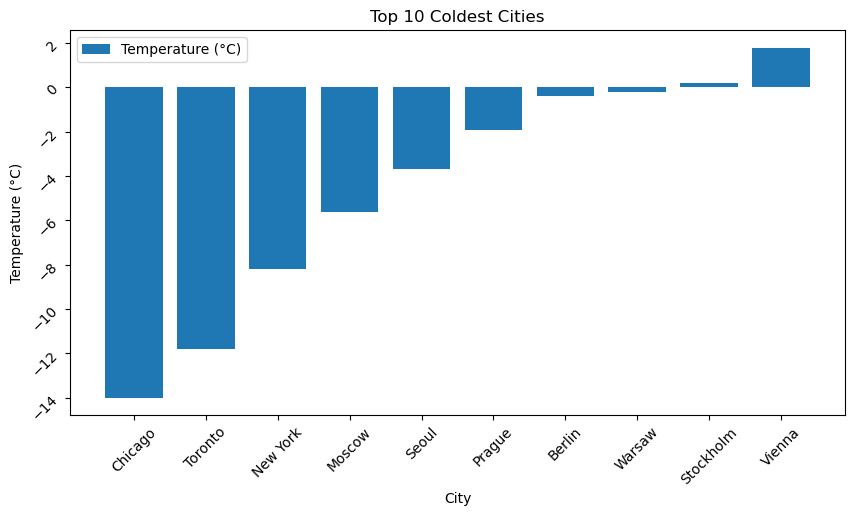

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(top_10_coldest["City"], top_10_coldest["Temperature"], label='Temperature (°C)')
plt.xlabel("City")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.ylabel("Temperature (°C)")
plt.title("Top 10 Coldest Cities")
plt.legend()
plt.show()

In [11]:
hottest_city = df.loc[df["Temperature"].idxmax()]
coldest_city = df.loc[df["Temperature"].idxmin()]

In [12]:
print(f"Hottest City: {hottest_city['City']} ({hottest_city['Temperature']}°C)")
print(f"Coldest City: {coldest_city['City']} ({coldest_city['Temperature']}°C)")

Hottest City: Cape Town (32.5°C)
Coldest City: Chicago (-14.0°C)
